___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting Descent, KNN, Random Forest, and Confusion Matrices.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

**Objective of the project**<br>
Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. This project would fall under what is commonly known as HR Analytics or People Analytics.

### Importing Modules

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [175]:
df = pd.read_csv("HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [177]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'Departments ' : 'department',
                        'left' : 'Attrition'
                        })

In [178]:
# Let's first check for any duplicate records
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 3008


In [180]:
#df[df.duplicated()]

In [181]:
#df[(df['satisfaction_level']==0.46)&(df['last_evaluation']==0.57)&(df['average_montly_hours']==139)]

In [182]:
# Drop duplicate records
df_Churn = df[~df.duplicated()]
df_Churn.shape

(11991, 10)

In [183]:
df_Churn.describe(include = 'object')

,department,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


In [184]:
df_Churn.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


data has 2 categorical variable and 8 numerical variable.

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [185]:
for col in df_Churn.columns:
    if df_Churn[col].dtypes == 'object':
        print(df_Churn.groupby('Attrition')[col].value_counts())


Attrition  department 
0          sales          2689
           technical      1854
           support        1509
           IT              818
           RandD           609
           product_mng     576
           marketing       561
           accounting      512
           hr              488
           management      384
1          sales           550
           technical       390
           support         312
           IT              158
           hr              113
           marketing       112
           product_mng     110
           accounting      109
           RandD            85
           management       52
Name: department, dtype: int64
Attrition  salary
0          low       4566
           medium    4492
           high       942
1          low       1174
           medium     769
           high        48
Name: salary, dtype: int64


In [187]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df_Churn.groupby('Attrition')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
Attrition,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion
satisfaction,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
projectCount,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
averageMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
yearsAtCompany,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
Attrition,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


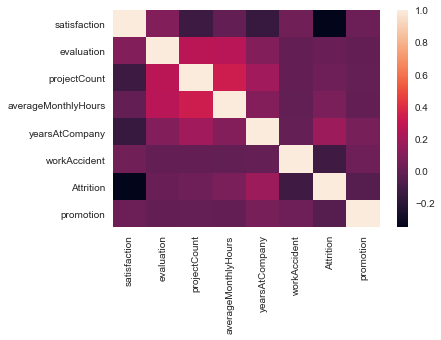

In [188]:
#Correlation Matrix
corr = df_Churn.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [140]:
#pip install autoviz

Shape of your Data Set: (14999, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################


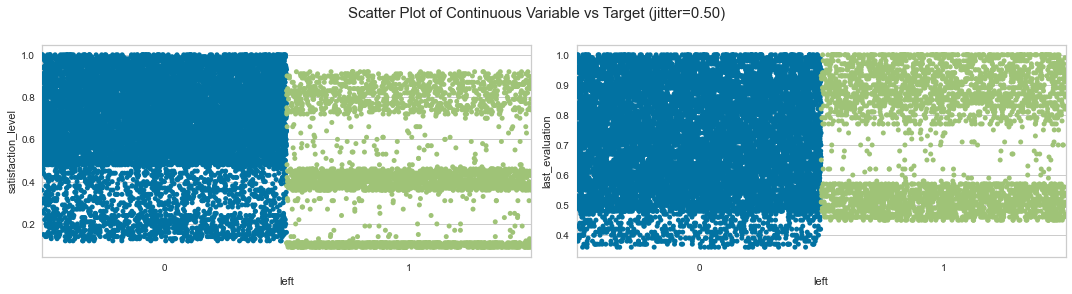

Total Number of Scatter Plots = 3


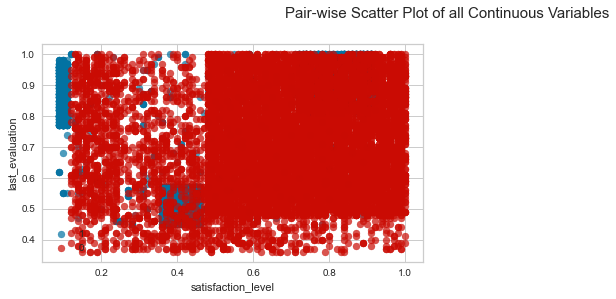

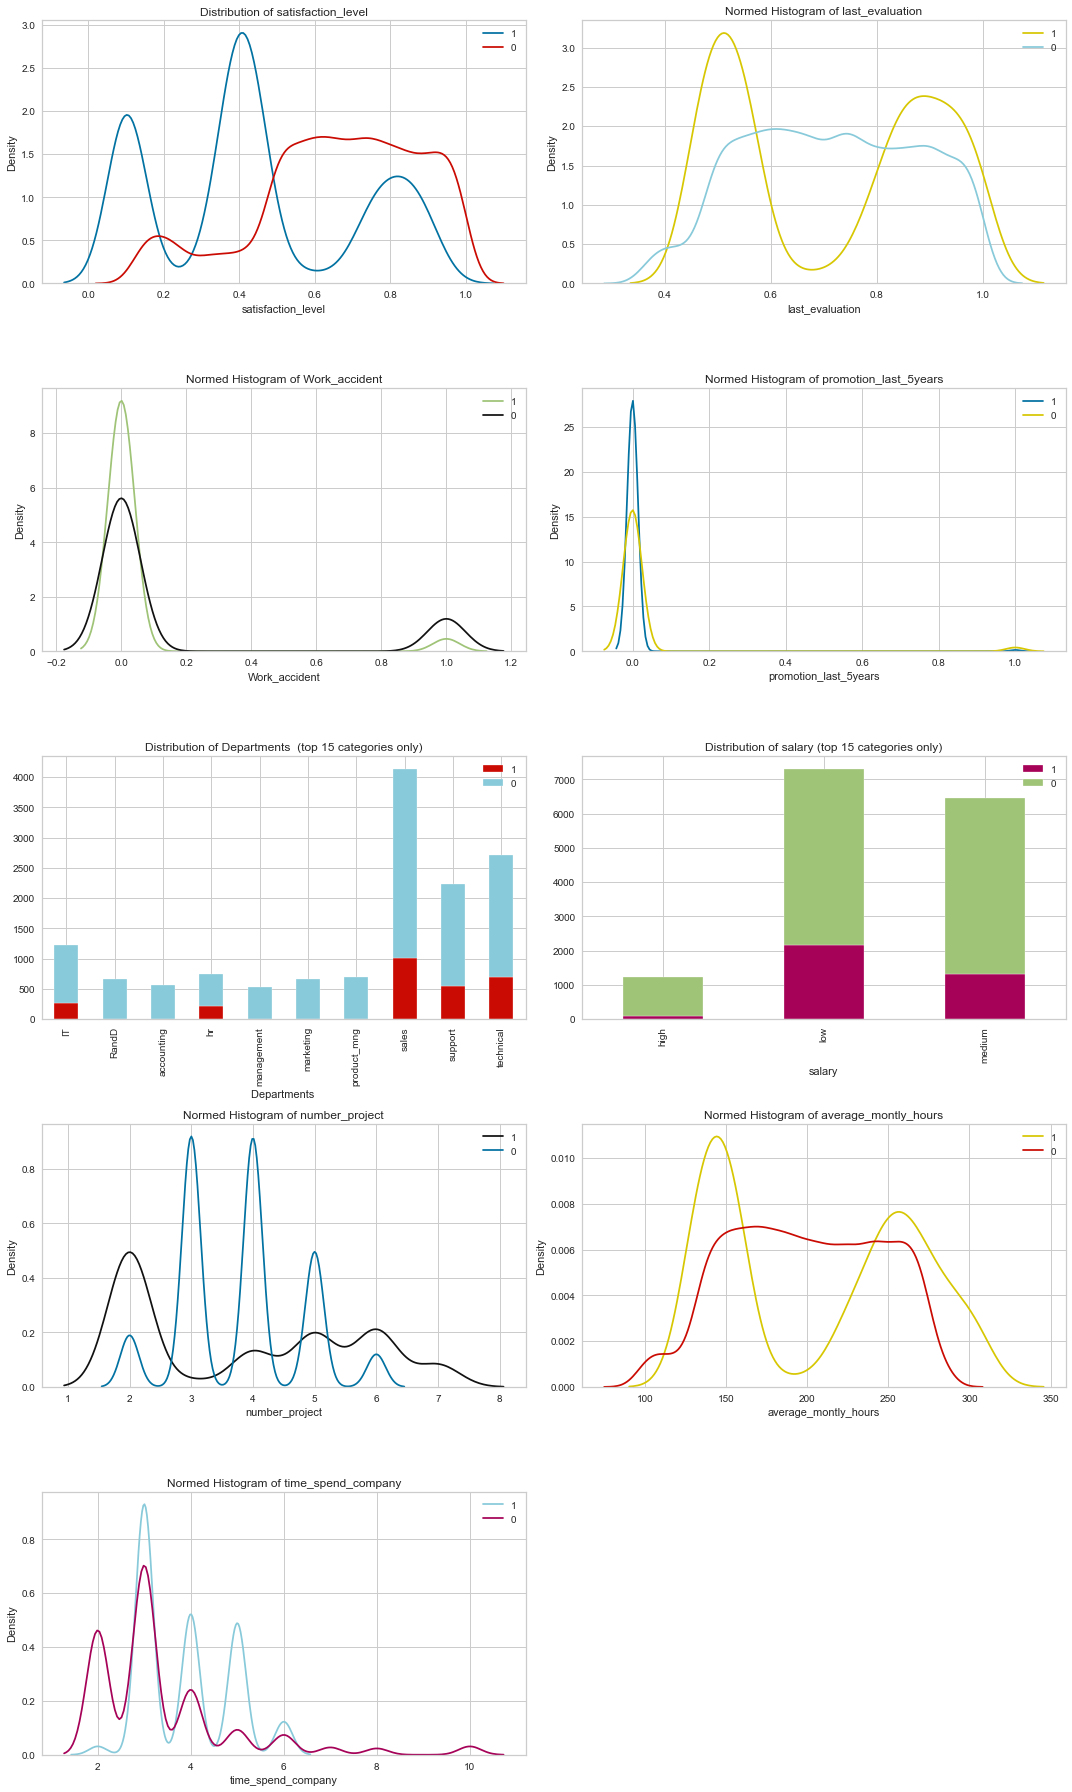

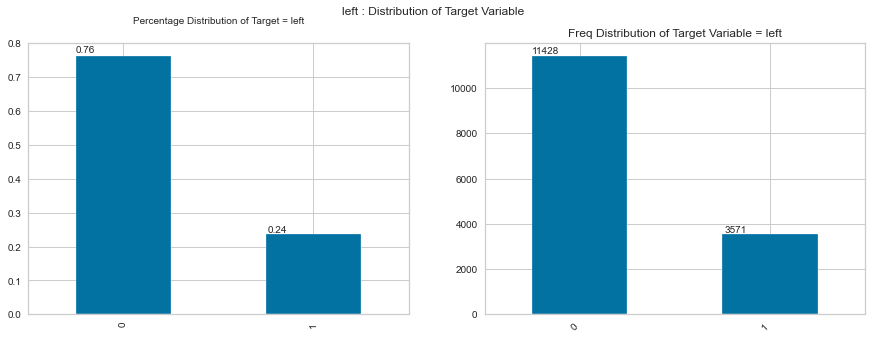

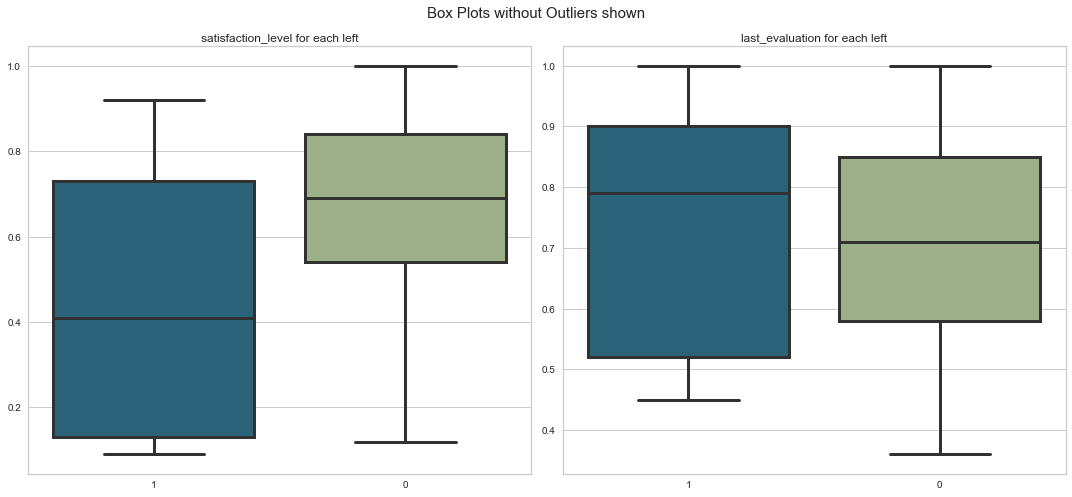

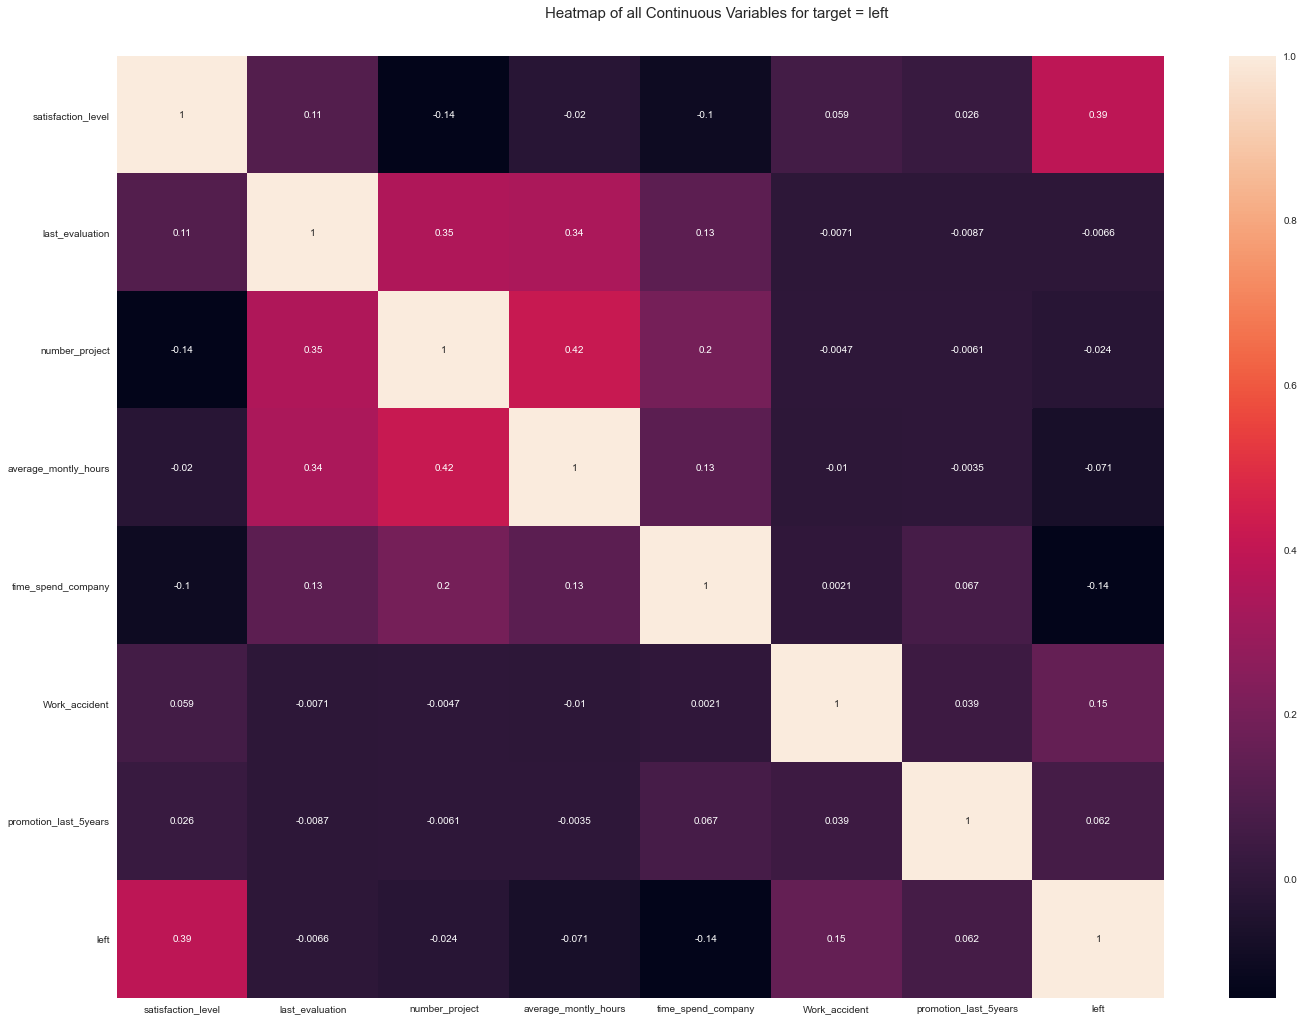

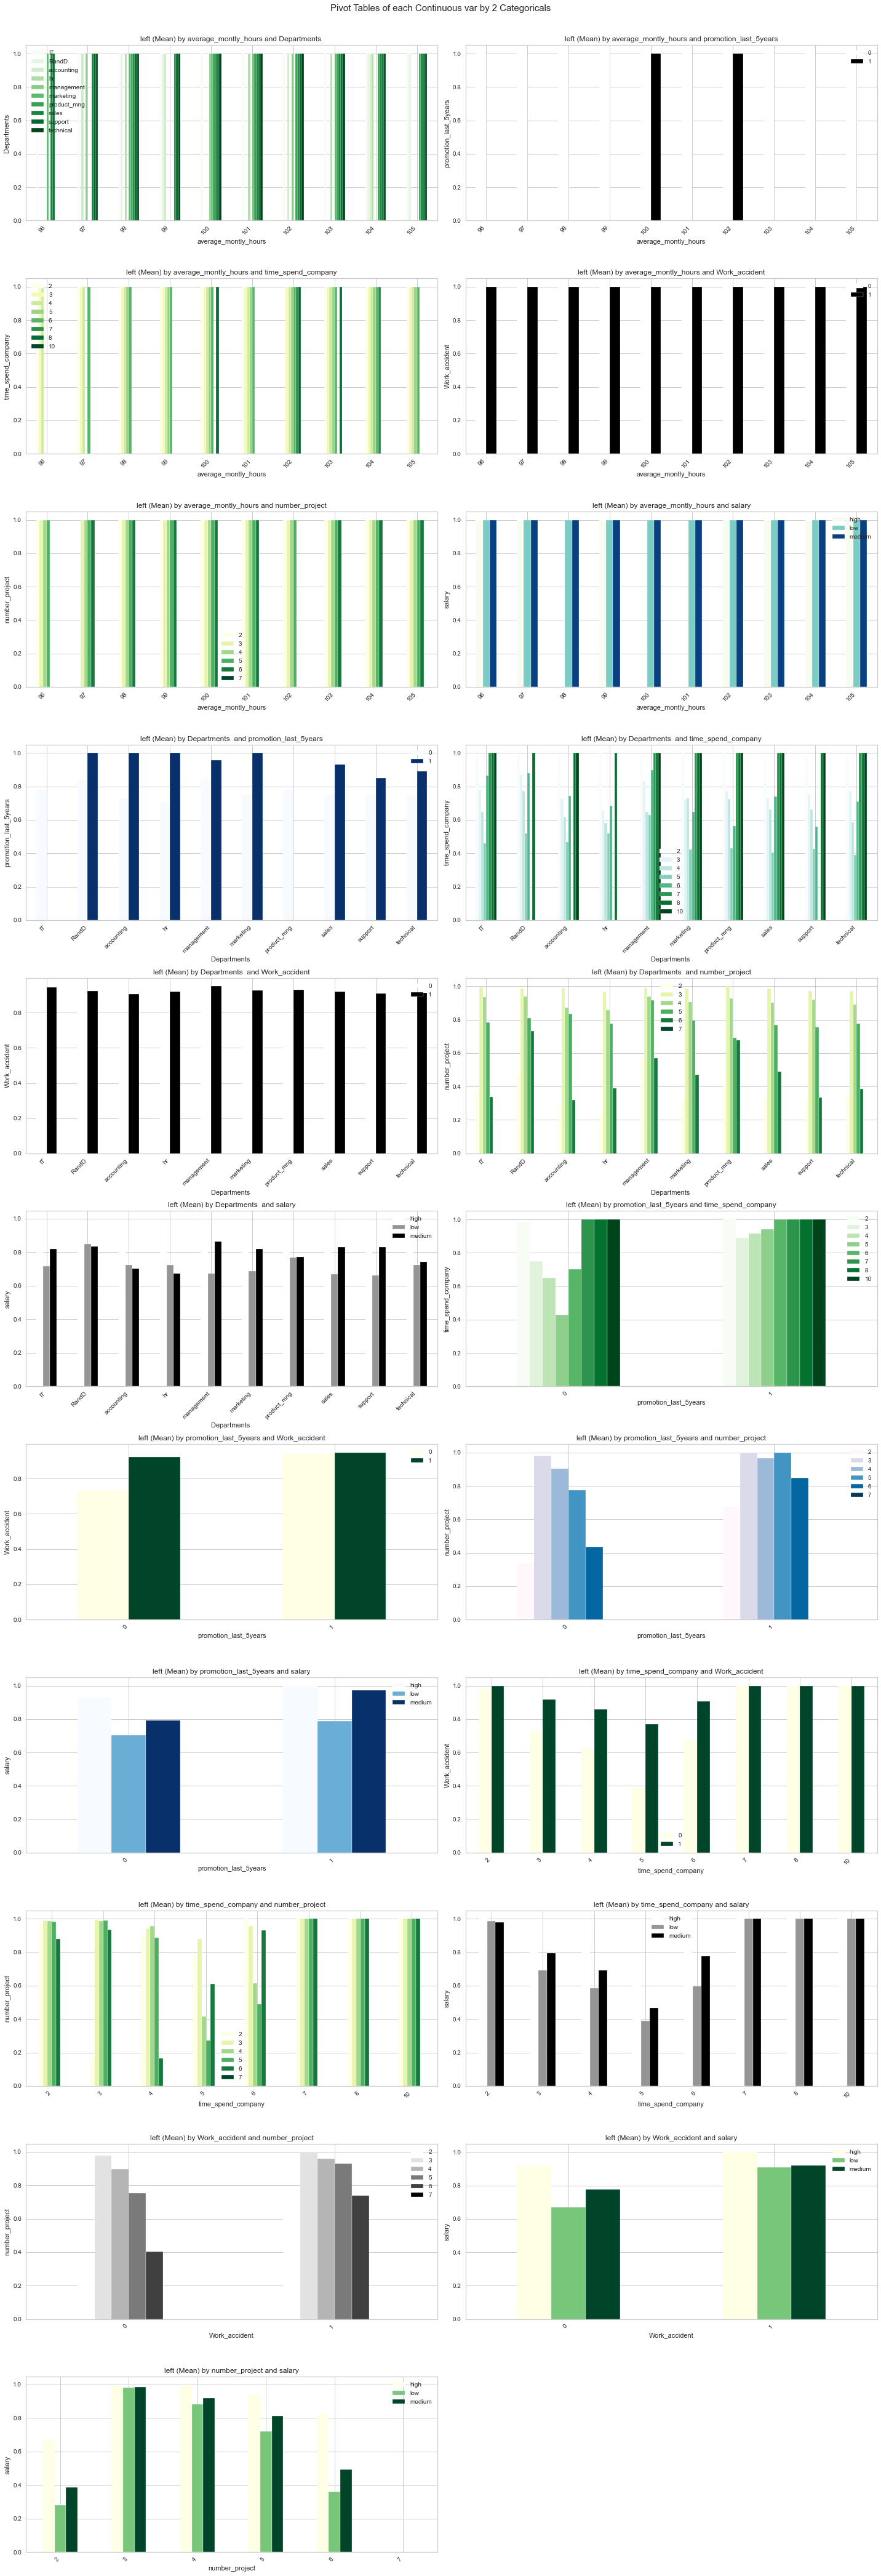

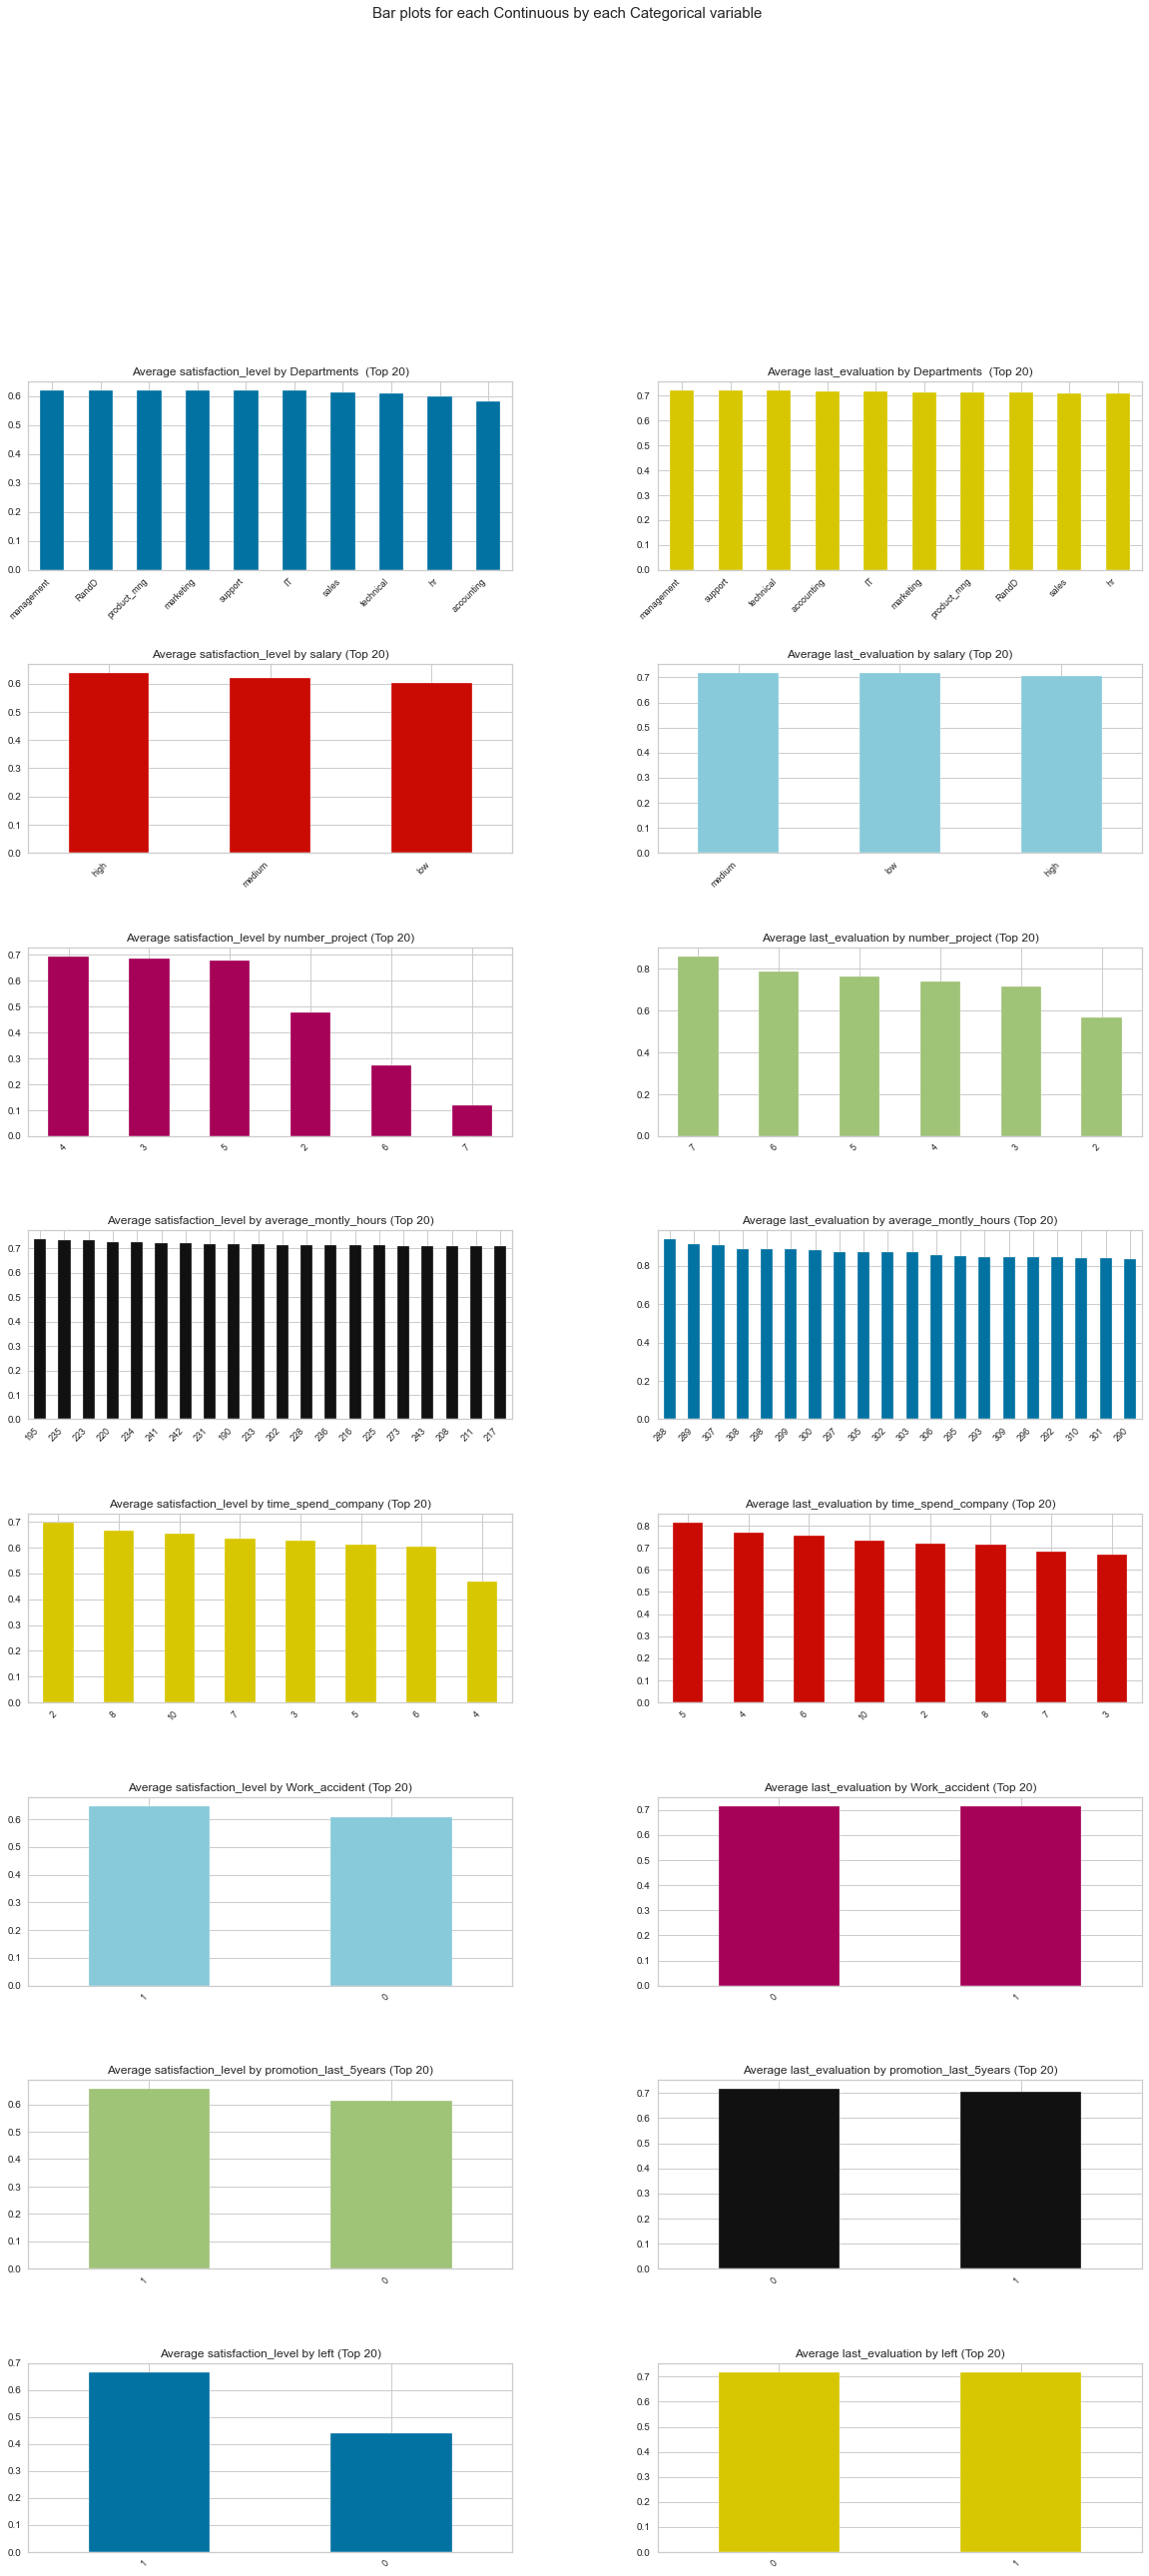

Time to run AutoViz (in seconds) = 15.200

 ###################### VISUALIZATION Completed ########################


In [141]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="left",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=20000,
    max_cols_analyzed=50,
)

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [144]:
df_Churn.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

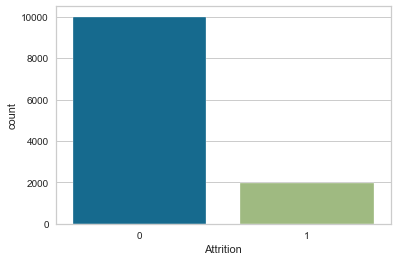

In [190]:
sns.countplot(df_Churn.Attrition);

### Feature Engineering

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [235]:
df_Churn['productivity'] = df_Churn['projectCount']/df_Churn['yearsAtCompany']

In [236]:
df_Churn['employer_satisfaction'] = df_Churn['evaluation']*df_Churn['promotion']

In [234]:
df_Churn.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'Attrition', 'promotion',
       'department', 'salary'],
      dtype='object')

**Distribution of Satisfaction-Evaluation-AverageMonthlyHours**

Text(0, 0.5, 'Employee Count')

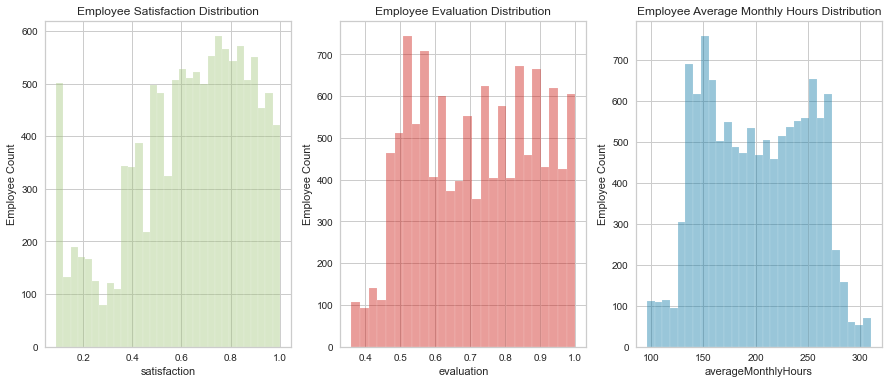

In [189]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df_Churn.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df_Churn.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df_Churn.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

**Salary&Attrition**<br>
-Majority of employees who left either had low or medium salary.<br>
-Barely any employees left with high salary<br>
-Employees with low to average salaries tend to leave the company.

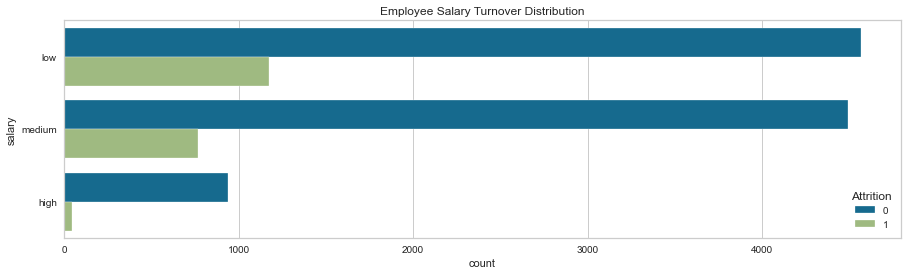

In [193]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='Attrition', data=df_Churn).set_title('Employee Salary Turnover Distribution');

**Department V.S. Turnover**<br>
The sales, technical, and support department were the top 3 departments to have employee turnover<br>
The management department had the smallest amount of turnover

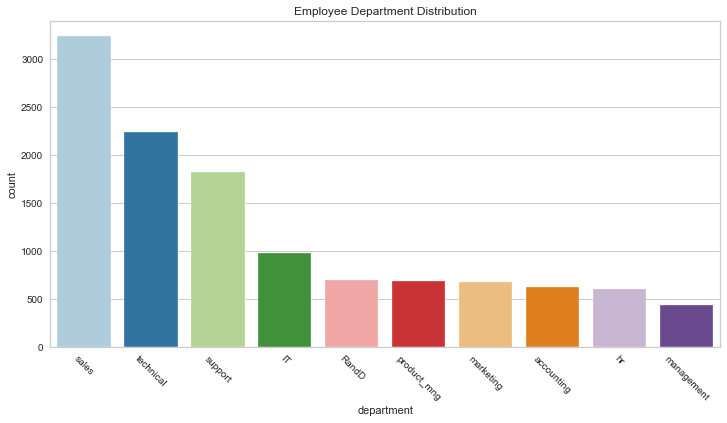

In [199]:
# Employee distribution
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=[12,6])
sns.countplot(x='department', data=df_Churn,order=df_Churn['department'].value_counts().index, palette='Paired').set_title('Employee Department Distribution');
# Rotate x-labels
plt.xticks(rotation=-45);

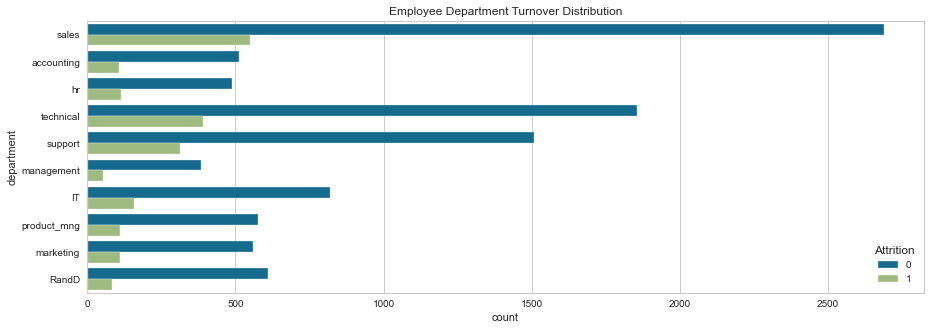

In [203]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='Attrition', data=df_Churn).set_title('Employee Department Turnover Distribution');

**Attrition V.S. ProjectCount**
More than half of the employees with 2,6, and 7 projects left the company<br>
Majority of the employees who did not leave the company had 3,4, and 5 projects<br>
All of the employees with 7 projects left the company<br>
There is an increase in employee turnover rate as project count increases

[Text(0, 0.5, 'Percent')]

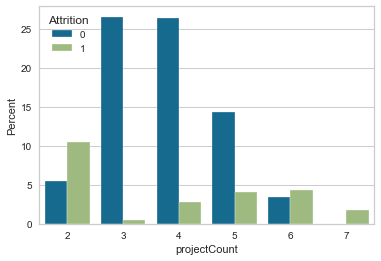

In [204]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="Attrition", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

**Attrition V.S. Evaluation**
-There is a biomodal distribution for those that had a turnover.<br>
-Employees with low performance tend to leave the company more<br>
-Employees with high performance tend to leave the company more<br>
-The sweet spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

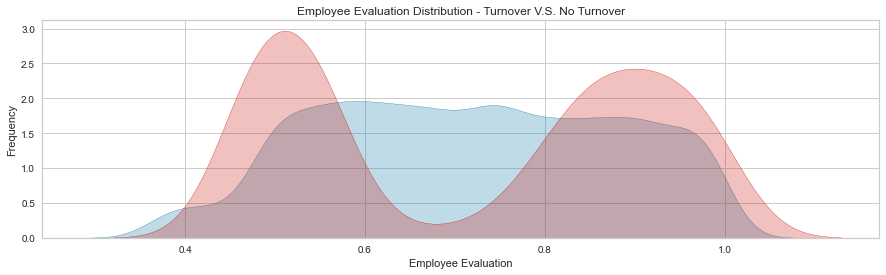

In [206]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

**Attrition V.S. AverageMonthlyHours**<br>
-Another bi-modal distribution for employees that Attrition<br>
-Employees who had less hours of work (150hours or less) left the company more<br>
-Employees who had too many hours of work (250 or more) left the company<br>
-Employees who left generally were underworked or overworked.

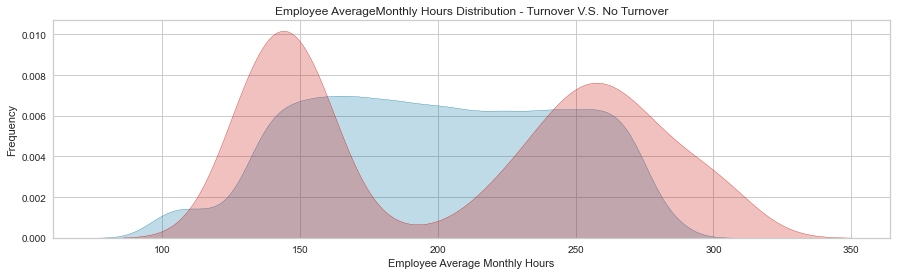

In [210]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover');

**Attrition V.S. Satisfaction**<br>
There is a tri-modal distribution for employees that turnovered<br>
Employees who had really low satisfaction levels (0.2 or less) left the company more<br>
Employees who had low satisfaction levels (0.3~0.5) left the company more<br>
Employees who had really high satisfaction levels (0.7 or more) left the company more

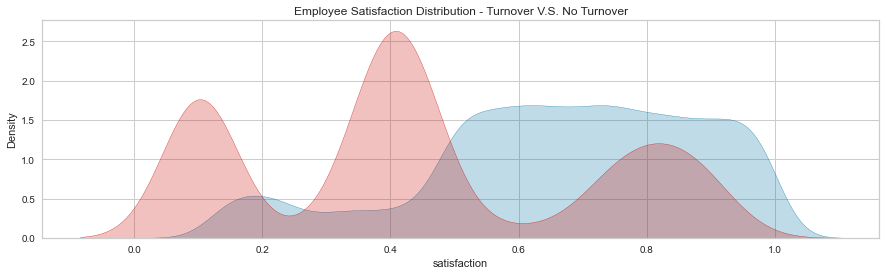

In [215]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df_Churn.loc[(df_Churn['Attrition'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover');

**ProjectCount VS AverageMonthlyHours**<br>
-As project count increased, so did average monthly hours<br>
-Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.<br>
-Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects<br>
-In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

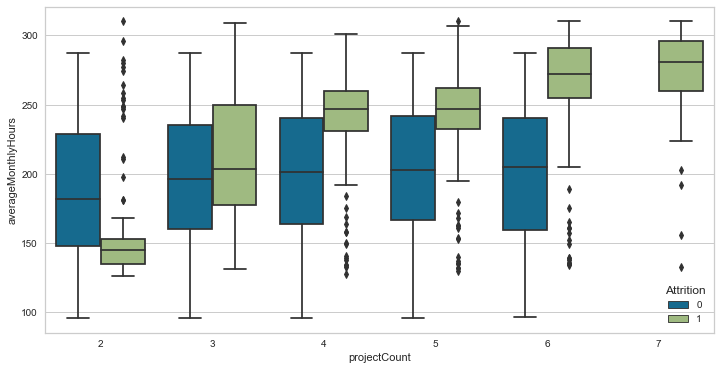

In [219]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month
plt.figure(figsize=[12,6])
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="Attrition", data=df_Churn);

**ProjectCount VS Evaluation**<br>
This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.

<AxesSubplot:xlabel='projectCount', ylabel='evaluation'>

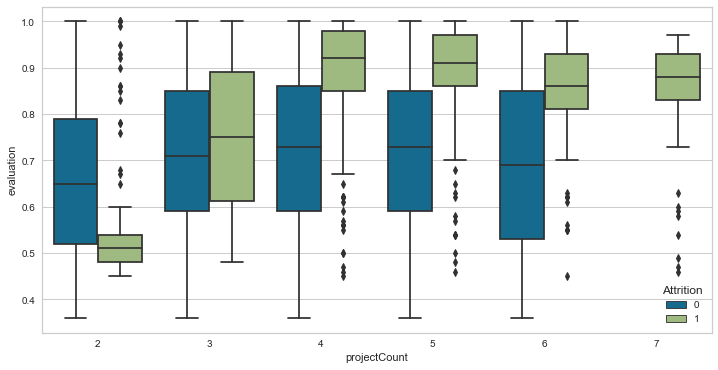

In [222]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a Attrition though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
plt.figure(figsize=[12,6])
sns.boxplot(x="projectCount", y="evaluation", hue="Attrition", data=df_Churn);


**Satisfaction&AverageMonthlyHours**
Satisfaction was below 0.2 and AverageMonthlyHours were greater than 200. Which could be a good indication that employees who left the company were overloaded workers and felt horrible at their job.

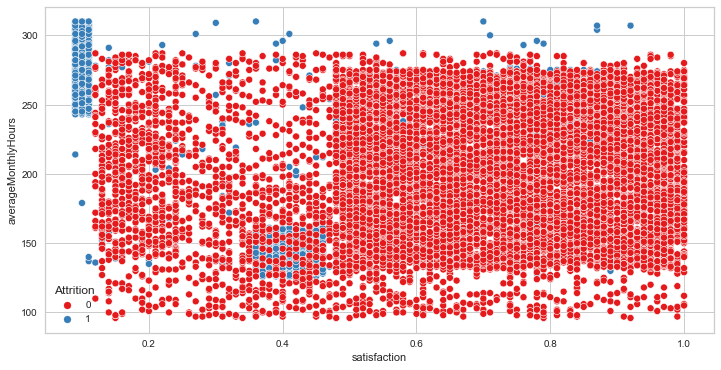

In [224]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df_Churn['satisfaction'],y=df_Churn['averageMonthlyHours'],hue=df_Churn['Attrition'],palette='Set1')
plt.show();

**Satisfaction VS Evaluation**<br>
-There are 3 distinct clusters for employees who left the company<br>
Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.<br>
Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35-0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.<br>
Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7-1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

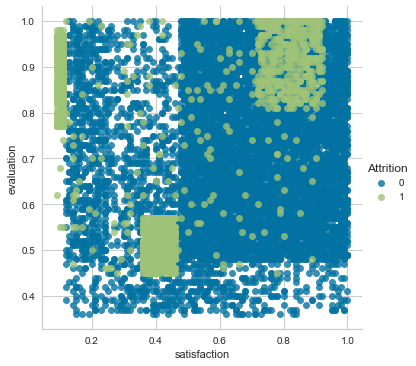

In [229]:
sns.lmplot(x='satisfaction', y='evaluation', data=df_Churn,
           fit_reg=False, # No regression line
           hue='Attrition');   # Color by evolution stage

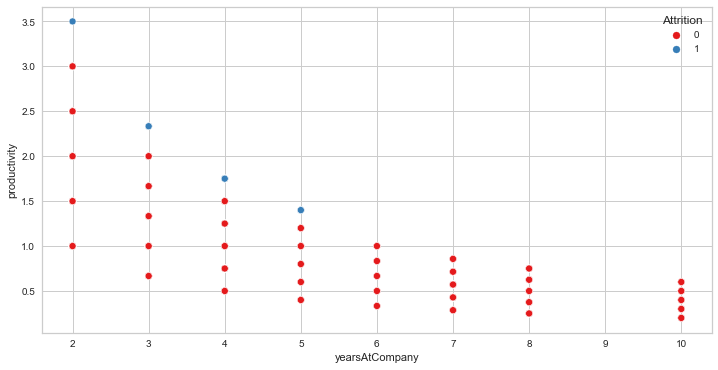

In [237]:
# It is obvious that workers tends to stay while the working years increase
plt.figure(figsize=[12,6])
sns.scatterplot(x=df_Churn['yearsAtCompany'],y=df_Churn['productivity'],hue=df_Churn['Attrition'],palette='Set1')
plt.show();

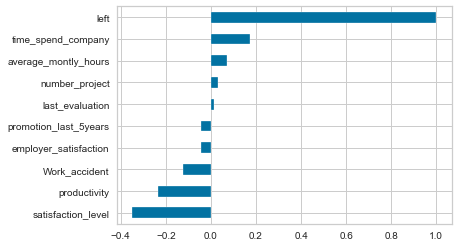

In [155]:
df_Churn.corr()["Attrition"].sort_values().plot.barh();

In [231]:
#df_Churn.number_project.value_counts()

**Attrition V.S. YearsAtCompany**<br>
-More than half of the employees with 4 and 5 years left the company<br>
-Employees with 5 years should highly be looked into

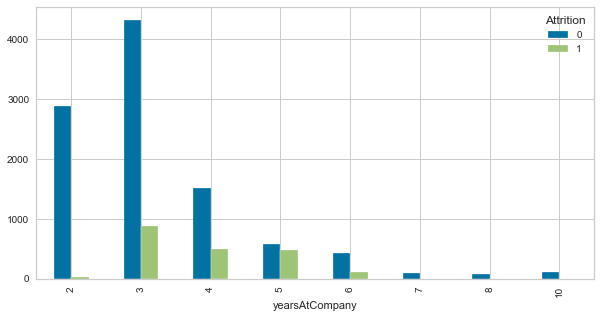

In [240]:
pd.crosstab(df_Churn['yearsAtCompany'],df_Churn['Attrition']).plot(kind='bar',figsize=(10,5));

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

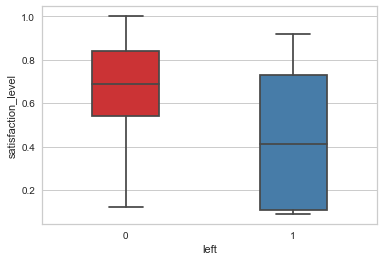

In [167]:
#Let's create a kernel density estimation (KDE) plot colored by the value of the target.
sns.boxplot(x='left', y='satisfaction_level',data=df_Churn,palette='Set1',width=.4)

<AxesSubplot:xlabel='satisfaction', ylabel='Density'>

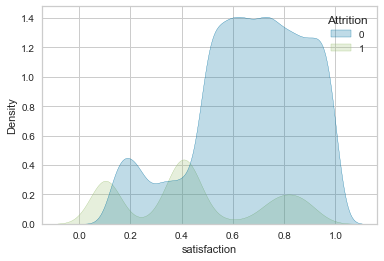

In [213]:
sns.kdeplot(data=df_Churn, x="satisfaction", hue="Attrition",shade=True)

In [242]:
df_Churn.groupby('projectCount').mean()

,satisfaction,evaluation,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion,productivity,employer_satisfaction
projectCount,,,,,,,,,
2,0.499071,0.584640,164.812263,3.186473,0.111252,0.541719,0.012010,0.669839,0.006416
3,0.689418,0.717415,197.337784,3.144602,0.175852,0.010795,0.017614,1.078581,0.012753
4,0.694280,0.735682,203.872456,3.300407,0.160651,0.064315,0.020624,1.375699,0.014898
5,0.671155,0.750072,209.125392,3.604120,0.156740,0.153605,0.014778,1.588907,0.010923
6,0.314673,0.765654,230.392252,4.154964,0.134383,0.449153,0.015738,1.563127,0.011235
7,0.116690,0.863517,275.620690,4.110345,0.013793,1.000000,0.000000,1.723448,0.000000


## 3. Data Pre-Processing

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



**labelencoder will not keep the order so we used replace method instead.**

In [ ]:
#df["salary"] = df["salary"].apply(lambda x: 1 if x=="low" else 2 if x=="medium" else 3)

In [245]:
condition = {'low':0, 'medium':1, 'high':2}
df_Churn.salary = df.salary.replace(condition)

In [246]:
df_Churn.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion,department,salary,productivity,employer_satisfaction
0,0.38,0.53,2,157,3,0,1,0,sales,0,0.666667,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0.833333,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,1,1.750000,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1.000000,0.0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0.666667,0.0


**Other categorical data department has no order between the categories, in this case we will use getdummies()**

In [247]:
df_Churn = pd.get_dummies(df_Churn, columns = ['department'] , prefix_sep = "_",drop_first = True)
df_Churn.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Attrition,promotion,salary,productivity,employer_satisfaction,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0.666667,0.0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0.833333,0.0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,1.750000,0.0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1.000000,0.0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0.666667,0.0,0,0,0,0,0,0,1,0,0


In [248]:
#df_Churn.salary.value_counts()

<AxesSubplot:>

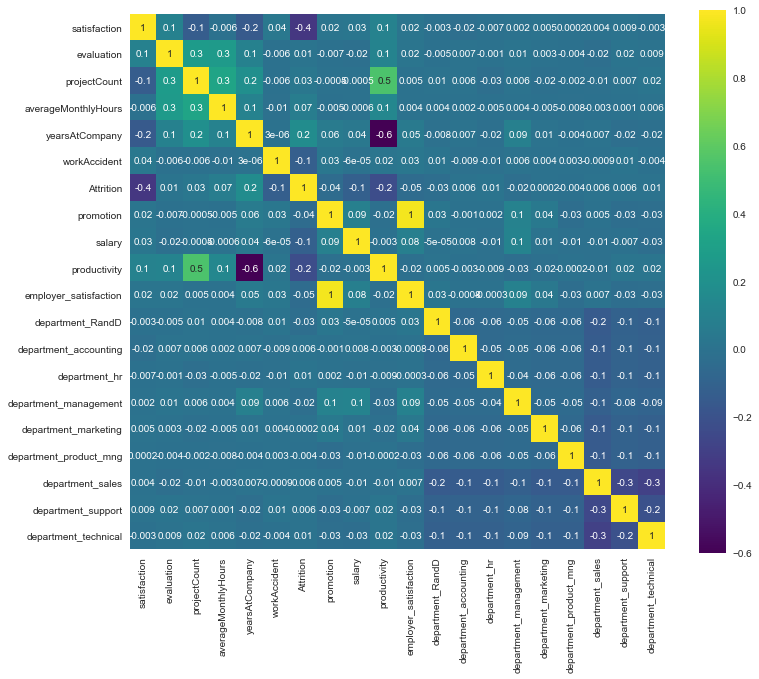

In [249]:
# create correlation plot for finding the best parameters
plt.figure(figsize=(12,10))
sns.heatmap(df_Churn.corr(), annot=True,fmt='.1g', cmap='viridis',square=True)

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

## I do not find scaling necessary most of the features already tend to normal distribution although few of the them distribution are skewed so I decided to keep the orginality of the data. 

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [250]:
df_Churn.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'Attrition', 'promotion', 'salary',
       'productivity', 'employer_satisfaction', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

**i. Create a new dataset with two variables of your choice**

**it is found that most important factor to leave the company is satisfaction, productivity and years at the company therefore I include only 3 features inmy cluster.**

In [251]:
df_cluster = df_Churn[['satisfaction', 'productivity', 'yearsAtCompany']]
df_cluster.head()

,satisfaction,productivity,yearsAtCompany
0,0.38,0.666667,3
1,0.80,0.833333,6
2,0.11,1.750000,4
3,0.72,1.000000,5
4,0.37,0.666667,3


In [252]:
# Hopkins test measures the clustering tendency of a data set by measuring the probability that a given data set.
# if the value is close to 0, it means the dataset tends to cluster, if it is close to 1 that means dataset does not tend to cluster.
from pyclustertend import hopkins
hopkins(df_cluster,df_cluster.shape[0])

0.0010366447517945957

**ii. Determine optimal number of clusters**

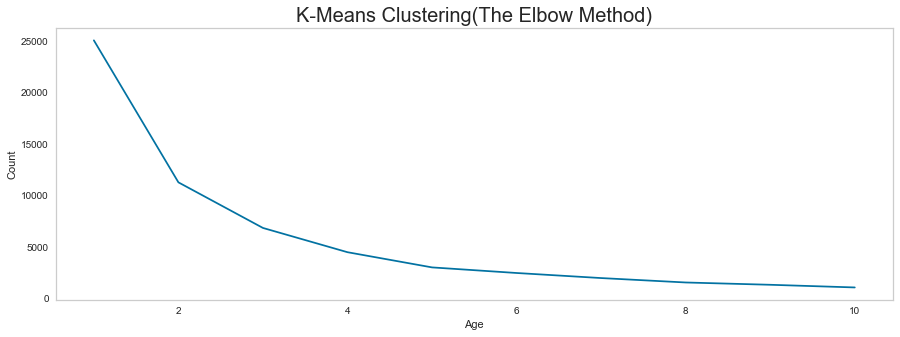

In [253]:
#Let's check optimal number of clusters by elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

In [254]:
#pip install -U yellowbrick
#conda update scikit-learn


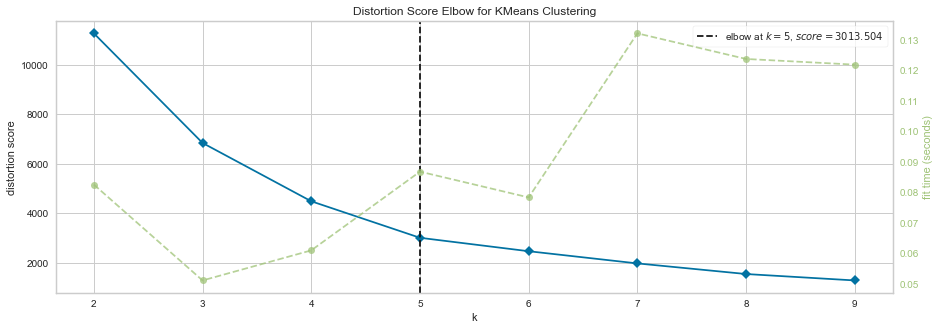

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [255]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_cluster)
visu.poof()

**iii. Determine optimal number of clusters using Dendogram**

In [259]:
from scipy.cluster.hierarchy import linkage

In [260]:
hc_complete = linkage(df_cluster, "complete")
hc_ward = linkage(df_cluster, "ward")

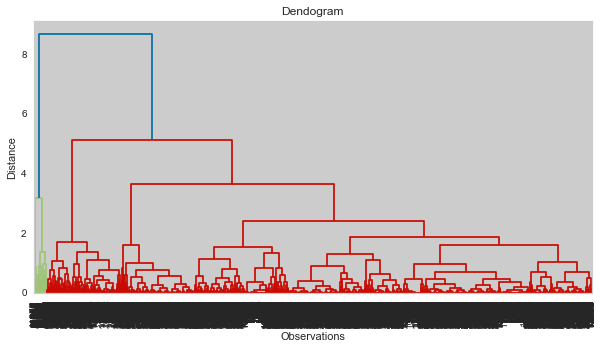

In [261]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

**iii. Apply K Means**

In [57]:
kmeansmodel = KMeans(n_clusters=3)
y_means = kmeansmodel.fit_predict(df_cluster.values)
y_means

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [62]:
df_cluster['cluster'] = y_means
df_cluster.cluster.value_counts()

0    7192
2    2913
1    1886
Name: cluster, dtype: int64

**iv. Visualizing and Labeling All the Clusters**

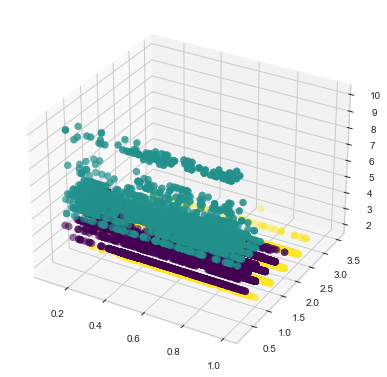

In [69]:
from mpl_toolkits.mplot3d import Axes3D

clusters= kmeansmodel.labels_
centers = kmeansmodel.cluster_centers_

plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_cluster.iloc[:,0],df_cluster.iloc[:,1],df_cluster.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

In [71]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
df_cluster['cluster'] =  kmeansmodel.labels_
trace1 = go.Scatter3d(
    x = df_cluster['satisfaction_level'],
    y = df_cluster['productivity'],
    z = df_cluster['time_spend_company'],
    mode ='markers',
    marker = dict(color = df_cluster['cluster'], size = 6, line = dict(color= df_cluster['cluster'], width= 12), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'satisfaction_level', scene = dict(xaxis = dict(title  = 'Customer Churn'), yaxis = dict(title  = 'productivity'), zaxis = dict(title  = 'time_spend_company')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

## 5. Model Building

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ClassPredictionError
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [76]:
df_Churn.columns

Index(['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'salary',
       'productivity', 'employer_satisfaction', 'Departments _Tech',
       'Departments _accounting', 'Departments _hr', 'Departments _management',
       'Departments _marketing', 'Departments _product_mng',
       'Departments _sales'],
      dtype='object')

In [78]:
df_Churn = df_Churn.drop(['last_evaluation','number_project'],axis=1)

In [79]:
X = df_Churn.drop('left', axis = 1)
y = df_Churn['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

**Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model**


In [82]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [83]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3001
           1       0.00      0.00      0.00       597

    accuracy                           0.83      3598
   macro avg       0.42      0.50      0.45      3598
weighted avg       0.70      0.83      0.76      3598



 ---Logistic Model---
Logistic AUC = 0.79
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      3001
           1       0.41      0.82      0.55       597

    accuracy                           0.78      3598
   macro avg       0.68      0.79      0.70      3598
weighted avg       0.86      0.78      0.80      3598



 ---Decision Tree Model---
Decision Tree AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.89      0.92      0.90       597

    accuracy                           0.97   

### #Gradient Boosting Classifier

#### Model Building

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


#### Prediction

### #KNeighbors Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

### #Random Forest Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___